In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

### 1. Feature Extraction

#### DictVectorizer

Converts dictionary object to matrix

In [2]:
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]

In [3]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit_transform(data) #creates a 2-d matrix

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

Alternatively...

In [4]:
np.array(data) #create numpy array

array([{'age': 4, 'height': 96.0}, {'age': 1, 'height': 73.9},
       {'age': 3, 'height': 88.9}, {'age': 2, 'height': 81.6}],
      dtype=object)

In [5]:
pd.DataFrame(data) #create dataframe

,age,height
0,4,96.0
1,1,73.9
2,3,88.9
3,2,81.6


### Data cleaning

#### SimpleImputer

#### Example1

In [6]:
X = np.array([[7, 1], [None, 8], [2, None], [9, 6]])

In [7]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean', add_indicator=True) #add_indicator flag adds one column per missing value, and indicates the missing value in the corresponding row by a 1.
si.fit_transform(X)

array([[7., 1., 0., 0.],
       [6., 8., 1., 0.],
       [2., 5., 0., 1.],
       [9., 6., 0., 0.]])

#### Example2

In [8]:
cols = ["age","sex","cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
heart_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", encoding='utf-8', header=None, names=cols)

In [9]:
heart_data #last column num is label, all others are features.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


There are 11 numeric features, 2 non-numeric features and 1 label.

In [11]:
heart_data.isnull().sum() # no null values among numeric features

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
heart_data["ca"].unique() # ? indicates that there're some missing values

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [13]:
heart_data['thal'].unique() # ? indicates that there're some missing values

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [14]:
heart_data[heart_data.ca == "?"]["ca"].count()

4

In [15]:
heart_data[heart_data.thal == "?"]["thal"].count()

2

In [16]:
heart_data.replace("?", np.nan, inplace=True) # replace all ? by np.nan

In [17]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
heart_data_imputed = si.fit_transform(heart_data)

#### KNNImputer

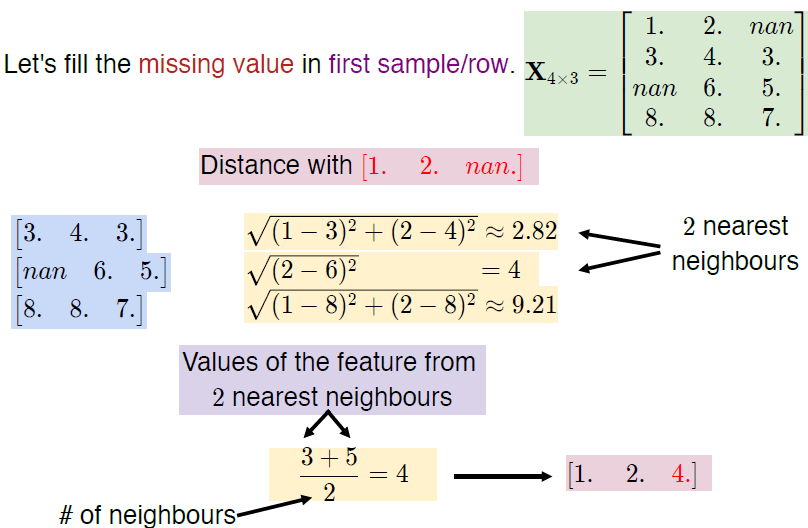

In [18]:
from sklearn.impute import KNNImputer

X = np.array([[1, 2, None], [3, 4, 3], [None, 6, 5], [8, 8, 7]])
knn = KNNImputer(n_neighbors=2, weights='uniform')
knn.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [19]:
from sklearn.impute import MissingIndicator

X = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
indicator = MissingIndicator()
indicator.fit_transform(X)

array([[False,  True],
       [False, False],
       [ True, False],
       [False, False]])

In [20]:
cols = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, encoding='utf-8', names=cols)
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [22]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [23]:
abalone_data = abalone_data.replace({'Sex': {'M': 1, 'F': 2, 'I': 3}})

In [24]:
abalone_data.pop('Rings') #Remove the label column

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [25]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


<AxesSubplot:ylabel='Density'>

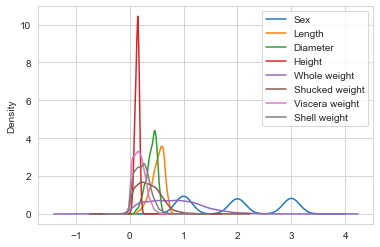

In [26]:
abalone_data.plot.kde()

<AxesSubplot:>

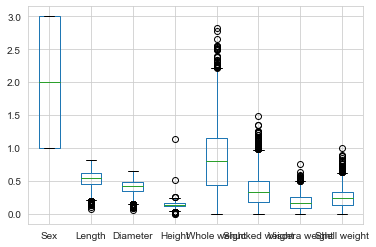

In [27]:
abalone_data.boxplot()

#### StandardScaler 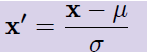

In [28]:
from sklearn.preprocessing import StandardScaler

X = np.array([4, 3, 2, 5, 6]).reshape((5, 1))

In [29]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.        ],
       [-0.70710678],
       [-1.41421356],
       [ 0.70710678],
       [ 1.41421356]])

#### MinMaxScaler (Normalization) 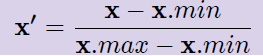

In [30]:
from sklearn.preprocessing import MinMaxScaler

X = np.array([15, 2, 5, -2, -5]).reshape((5,1))

In [31]:
mm = MinMaxScaler()
mm.fit_transform(X)

array([[1.  ],
       [0.35],
       [0.5 ],
       [0.15],
       [0.  ]])

#### MaxAbsScaler 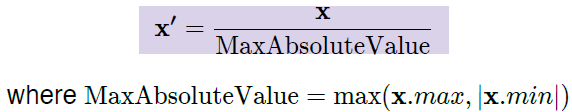

In [32]:
from sklearn.preprocessing import MaxAbsScaler

X = np.array([4, 2, 5, -2, -100]).reshape((5, 1))

In [33]:
ma = MaxAbsScaler()
ma.fit_transform(X)

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

#### FunctionTransfomer (Transforms based on user-defined function)

In [34]:
from sklearn.preprocessing import FunctionTransformer
X = np.array([[128, 2], [2, 256], [4, 1], [512, 64]])

In [35]:
ft = FunctionTransformer(np.log2)
ft.fit_transform(X)

array([[7., 1.],
       [1., 8.],
       [2., 0.],
       [9., 6.]])

In [36]:
ft = FunctionTransformer(np.mean) # mean of all elements
ft.fit_transform(X)

121.125

#### PolynomialTransfomation (Create all polynomial combinations)

In [37]:
X = np.array([[2, 3],[4, 5],[6,7]]) #Same example has been used in MLT Week-3 Cell #13

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,  36.,  42.,  49., 216., 252., 294., 343.]])

#### KBinsDiscretizer (Binning + One hot/ordinal encoding)

In [39]:
X = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1.0]).reshape(9,1)

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

KBD = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='onehot')
X_fit = KBD.fit_transform(X) #return sparse matrix
X_fit.toarray() #convert to numpy array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [41]:
X_fit.todense() #convert to matrix

matrix([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

#### Categorical Transformers

#### One-hot encoder

In [42]:
from sklearn.preprocessing import OneHotEncoder

X = np.array([1, 2, 6, 1, 8, 6]).reshape(6, 1) #4 unique values
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X) #one column for each unique value

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

#### Label encoder

In [43]:
from sklearn.preprocessing import LabelEncoder

X = np.array([1, 2, 6, 1, 8, 6]).reshape(6, ) #4 unique values.  If this is reshape to (6, 1), it gives a warning; why?
le = LabelEncoder()
le.fit_transform(X) # 1 is encoded as 0, 2 as 1, 6 as 2, and 8 as 3.

array([0, 1, 2, 0, 3, 2], dtype=int64)

#### Ordinal encoder

OrdinalEncoder can operate multi dimensional data, while LabelEncoder can transform only 1D data.

In [44]:
from sklearn.preprocessing import OrdinalEncoder

X = np.array([[1, 2, 6, 1, 8, 6], ['male', 'female', 'female', 'male', 'male', 'female']]).T
oe = OrdinalEncoder()
oe.fit_transform(X) # 1 is encoded as 0, 2 as 1, 6 as 2, and 8 as 3; 'male' as 1 and 'female' as 0

array([[0., 1.],
       [1., 0.],
       [2., 0.],
       [0., 1.],
       [3., 1.],
       [2., 0.]])

#### LabelBinarizer

In [45]:
from sklearn.preprocessing import LabelBinarizer
X = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']).reshape(10, 1)
lb = LabelBinarizer()
lb.fit_transform(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [46]:
# OneHotEncoder on this data produces the same result.  The only difference between OneHotEncoder and LabelBinarizer 
# appears to be that the former return a sparse matrix by default, while the latter returns a dense matrix by default.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

#### MultiLabelBinarizer

In [47]:
from sklearn.preprocessing import MultiLabelBinarizer

X = np.array([{'action', 'comedy' },
{'comedy'},
{'action', 'thriller'},
{'science-fiction', 'action', 'thriller'}]) #4 unique values

mlb = MultiLabelBinarizer()
mlb.fit_transform(X) # the columns are 'action', 'comedy', 'science-fiction' and 'thriller'

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

#### add_dummy_feature

In [48]:
from sklearn.preprocessing import add_dummy_feature

X = np.array([[7, 1], [1, 8], [2, 0], [9, 6]])

add_dummy_feature(X)

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

In [49]:
# create separate columns for each unique value
X = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot'])
pd.get_dummies(X, prefix='weather') # specify columns parameter, when used on a dataframe.

,weather_cold,weather_hot,weather_warm
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,1,0
6,0,0,1
7,1,0,0
8,0,0,1
9,0,1,0


### 2. Feature Selection

#### Column Transformer

In [50]:
X = np.array([[20.0, 11.2, 15.6, 13.0, 18.6, 16.4], ['male', 'female', 'female', 'male', 'male', 'female']]).T
X

array([['20.0', 'male'],
       ['11.2', 'female'],
       ['15.6', 'female'],
       ['13.0', 'male'],
       ['18.6', 'male'],
       ['16.4', 'female']], dtype='<U32')

In [51]:
from sklearn.compose import ColumnTransformer

column_trans = ColumnTransformer([('ageScaler', MaxAbsScaler(), [0]), ('pass', 'passthrough', [0]), ('genderEncoder', OneHotEncoder(dtype='int'), [1])])
#     remainder='drop', verbose_feature_names_out=False)
column_trans.fit_transform(X)

array([['1.0', '20.0', '0', '1'],
       ['0.5599999999999999', '11.2', '1', '0'],
       ['0.78', '15.6', '1', '0'],
       ['0.65', '13.0', '0', '1'],
       ['0.93', '18.6', '0', '1'],
       ['0.82', '16.4', '1', '0']], dtype='<U32')

#### TransformedTargetRegressor

In [52]:
# Here are the steps
# regressor.fit(X, func(y)) #fits regressor
# inverse_func(regressor.predict(X))  #Predicts X from y

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

tf = np.log # transformer function
tt = TransformedTargetRegressor(regressor=LinearRegression(), func=tf, inverse_func=np.exp)

In [54]:
# Generate some test values
X = np.arange(4).reshape(-1, 1)
y = np.exp(2 * X).ravel()

In [55]:
tt.fit(X, y)
tt.predict(X)  # this is equal to np.exp(2 * X) and basically equivalent to reverse fitting X for given y

array([  1.        ,   7.3890561 ,  54.59815003, 403.42879349])

In [56]:
x = np.array([10, 20, 30, 40])
x.shape[0], len(x)

(4, 4)

#### Filter-based selection methods

#### VarianceThreshold

In [57]:
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]

In [58]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data) #creates a 2-d matrix
np.var(data_transformed, axis=0)

array([ 1.25 , 67.735])

In [59]:
# selects only the second column, since variance of the first column is below given threshold
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=9)
vt.fit_transform(data_transformed)

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

#### SelectKBest

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect, mutual_info_regression

X_california, y_california = fetch_california_housing(return_X_y=True)

X, y = X_california[:2000, :], y_california[:2000]

X.shape

(2000, 8)

In [61]:
# Select 3 features using mutual_info_regression method
skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X, y)
X_new.shape

(2000, 3)

In [62]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### SelectPercentile

In [63]:
# Select 3 features using mutual_info_regression method
sp = SelectPercentile(mutual_info_regression, percentile=30)
X_new = sp.fit_transform(X, y)
X_new.shape

(2000, 3)

In [64]:
sp.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### GenericUnivariateSelect

In [65]:
# Select 3 features using mutual_info_regression method
gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=4)
X_new = gus.fit_transform(X, y)
X_new.shape

(2000, 4)

In [66]:
gus.get_feature_names_out()

array(['x0', 'x2', 'x6', 'x7'], dtype=object)

#### Wrapper-based selection methods

#### RFE  (RFE_CV)

In [67]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

print(selector.support_)  # True indicates selected columns

print(f"Rank of each feature are {selector.ranking_}") # rank 1 assigned to only selected features.

[ True False False False False False  True  True]
Rank of each feature are [1 5 4 3 6 2 1 1]


In [68]:
X_new = selector.transform(X) # returns only the previously "selected" columns
X_new.shape

(2000, 3)

#### SelectFromModel

In [69]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top 3 features: {np.argsort(estimator.coef_)[-3:]}')

model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
X_new.shape

Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]


(2000, 3)

In [70]:
X_new = selector.transform(X) # returns only the previously "selected" columns
X_new.shape

(2000, 3)

#### SequentialFeatureSelector

In [71]:
%%time

#Forward sequence selector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
X_new = sfs.fit_transform(X, y)
X_new.shape

Wall time: 125 ms


(2000, 3)

In [72]:
sfs.get_feature_names_out()

array(['x0', 'x5', 'x6'], dtype=object)

In [73]:
%%time

#Backward sequence selector - depends on n_features_to_select.
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
X_new = sfs.fit_transform(X, y)
X_new.shape

Wall time: 203 ms


(2000, 3)

In [74]:
sfs.get_feature_names_out()

array(['x0', 'x5', 'x6'], dtype=object)

### 3. Dimensionality reduction

#### PCA

Text(0.5, 1.0, 'Data points')

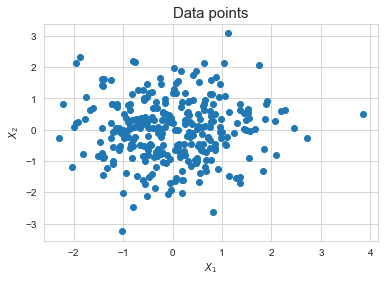

In [75]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=300, n_features=2, n_targets=1, random_state=42)
x1, x2 = X[:,0], X[:,1]
plt.scatter(x1, x2)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Data points', fontsize=15)

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [77]:
pca.components_

array([[-0.39345132, -0.91934545],
       [ 0.91934545, -0.39345132]])

In [78]:
pca.explained_variance_

array([0.96449834, 0.92896025])

In [79]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape, X_pca.shape)

(300, 2) (300, 1)


### 4. Handling class imbalance

In [80]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(data_url, sep=";")

<AxesSubplot:>

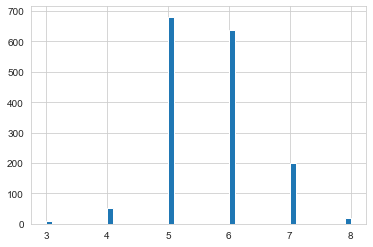

In [81]:
wine_data['quality'].hist(bins=50)

There is gross imbalance in classes.  Thus {3,4,7,8} are represented much lesser compared to {5,6}

In [82]:
X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']
X.shape, y.shape

((1599, 11), (1599,))

In [83]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)
X_rus, y_rus = undersample.fit_resample(X, y)

print(f"Original dataset shape:: {Counter(y)}")
print(f"Resample dataset shape:: {Counter(y_rus)}")  # Selects 10 from each of the {5,6} classes.

Original dataset shape:: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape:: Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


In [84]:
wine_data_modified = pd.concat([X_rus, y_rus], axis=1)
wine_data_modified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
5,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
6,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
7,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
8,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
9,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [85]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=42)
X_ros, y_ros = oversample.fit_resample(X, y)

print(f"Original dataset shape:: {Counter(y)}")
print(f"Resample dataset shape:: {Counter(y_ros)}")  # Selects 681 (by repeat-sampling) from each of the {5,6} classes.

Original dataset shape:: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape:: Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [86]:
wine_data_modified = pd.concat([X_ros, y_ros], axis=1)
wine_data_modified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
4082,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
4083,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
4084,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8


In [87]:
from collections import Counter
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

print(f"Original dataset shape:: {Counter(y)}")
print(f"Resample dataset shape:: {Counter(y_sm)}")  # Selects 681 (by repeat-sampling) from each of the {5,6} classes, by SMOTE

Original dataset shape:: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape:: Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [88]:
wine_data_modified = pd.concat([X_sm, y_sm], axis=1)
wine_data_modified

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,6.338835,0.750929,0.132279,1.483958,0.051381,17.037509,85.649163,0.992754,3.462608,0.788096,12.715291,8
4082,8.264061,0.504610,0.184921,2.215625,0.068797,35.687493,51.117163,0.994242,3.358750,0.716797,12.510157,8
4083,10.635631,0.347524,0.531485,2.609903,0.070495,5.049515,16.049515,0.997160,3.150000,0.663369,11.034660,8
4084,5.217329,0.450426,0.148722,1.913069,0.053045,22.911917,66.082324,0.991309,3.624375,0.774773,14.000000,8
